<a href="https://colab.research.google.com/github/spandit98/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction_Soumyadeep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

### In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# **Data Description**
Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [4]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt1
import seaborn as sns

In [5]:
#Importing the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Mobile Price Range Prediction/data_mobile_price_range.csv')

# Understanding the dataset

In [7]:
#Understanding the dataset
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [8]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [9]:
df.shape

(2000, 21)

In [10]:
df.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [12]:
#Finding null values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [13]:
#Finding duplicate values
df.duplicated().sum()

0

In [14]:
#Listing down all the features
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [15]:
#Seggregating dependent and independent variable
y = df['price_range']
x = df.drop('price_range', axis = 1)

In [16]:
df['price_range'].unique()

array([1, 2, 3, 0])

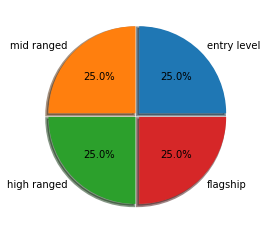

In [17]:
labels = ["entry level", "mid ranged", "high ranged", "flagship"]
values = df['price_range'].value_counts().values
explode = (0.03,0.03,0.03,0.03)
fig1, ax1 = plt1.subplots()
ax1.pie(values, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=360, labeldistance=1.1, wedgeprops = {'linewidth': 3})
plt1.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text major ticklabel objects>)

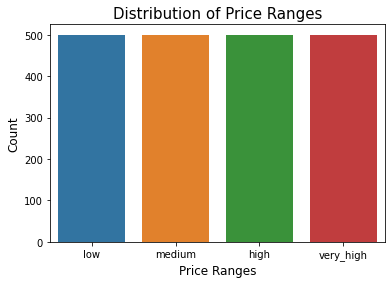

In [18]:
sns.countplot(df["price_range"])
plt1.title("Distribution of Price Ranges" , fontsize = 15)
plt1.xlabel("Price Ranges" ,  fontsize = 12)
plt1.ylabel("Count" , fontsize = 12)
plt1.xticks(fontsize = 10 , labels= ["low" , "medium" , "high" , "very_high"] , ticks = [0,1,2,3])
plt1.yticks(fontsize = 10)

In [19]:
cont_col = ['battery_power','px_height','px_width','ram']
discrete = ['clock_speed','fc','int_memory','mobile_wt','talk_time','sc_h','sc_w']

In [20]:
import warnings
warnings.filterwarnings('ignore')

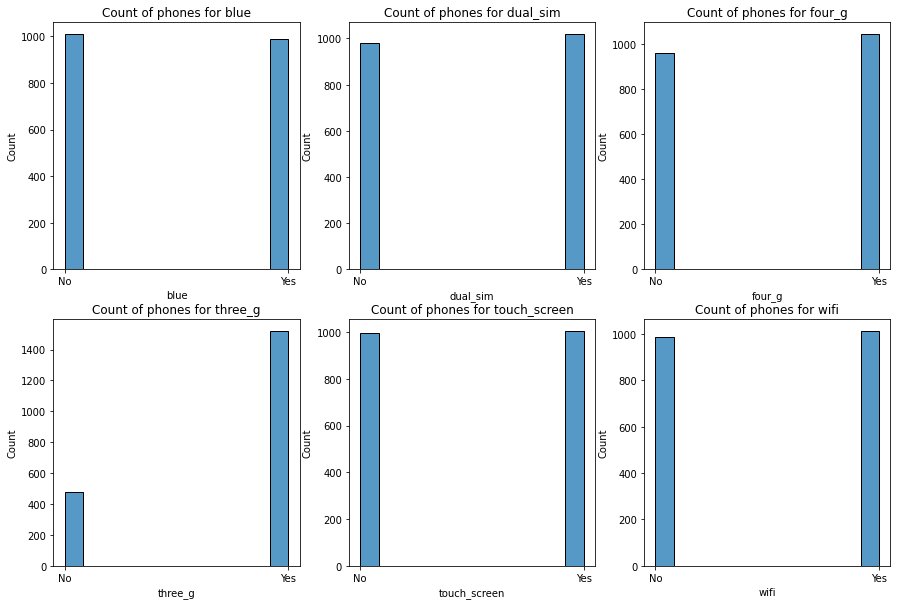

In [21]:
#Enlisting categorial variables
list1=['blue','dual_sim','four_g','three_g','touch_screen','wifi']

# visualizing the count of each by running a for loop
plt1.figure(figsize=(15,10))
for index,item in enumerate(list1):
  plt1.subplot(2,3,index+1)
  xtick=[0,1]
  label=['No','Yes']
  plt1.xticks(xtick,label)
  sns.histplot(df[item])
  plt1.title(f'Count of phones for {item}')

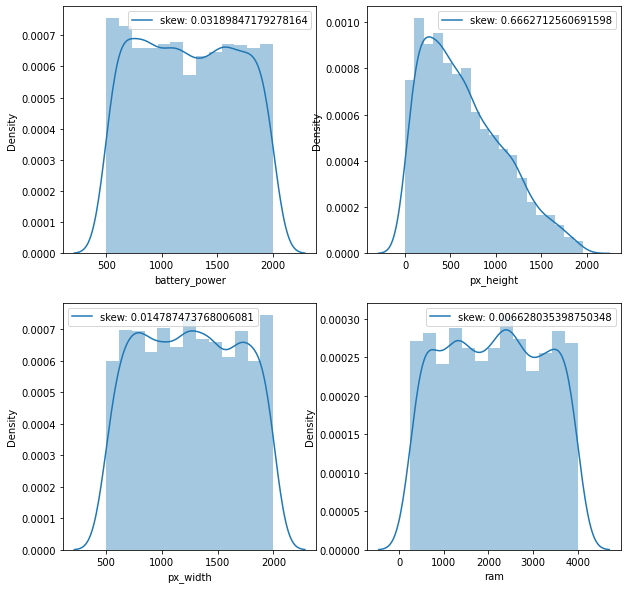

In [22]:
c= 1
plt1.figure(figsize = (10,10))
for i in cont_col:
    plt1.subplot(2,2,c)
    c=c+1
    sns.distplot(df[i])
    plt1.legend(['skew: '+str(df[i].skew())])

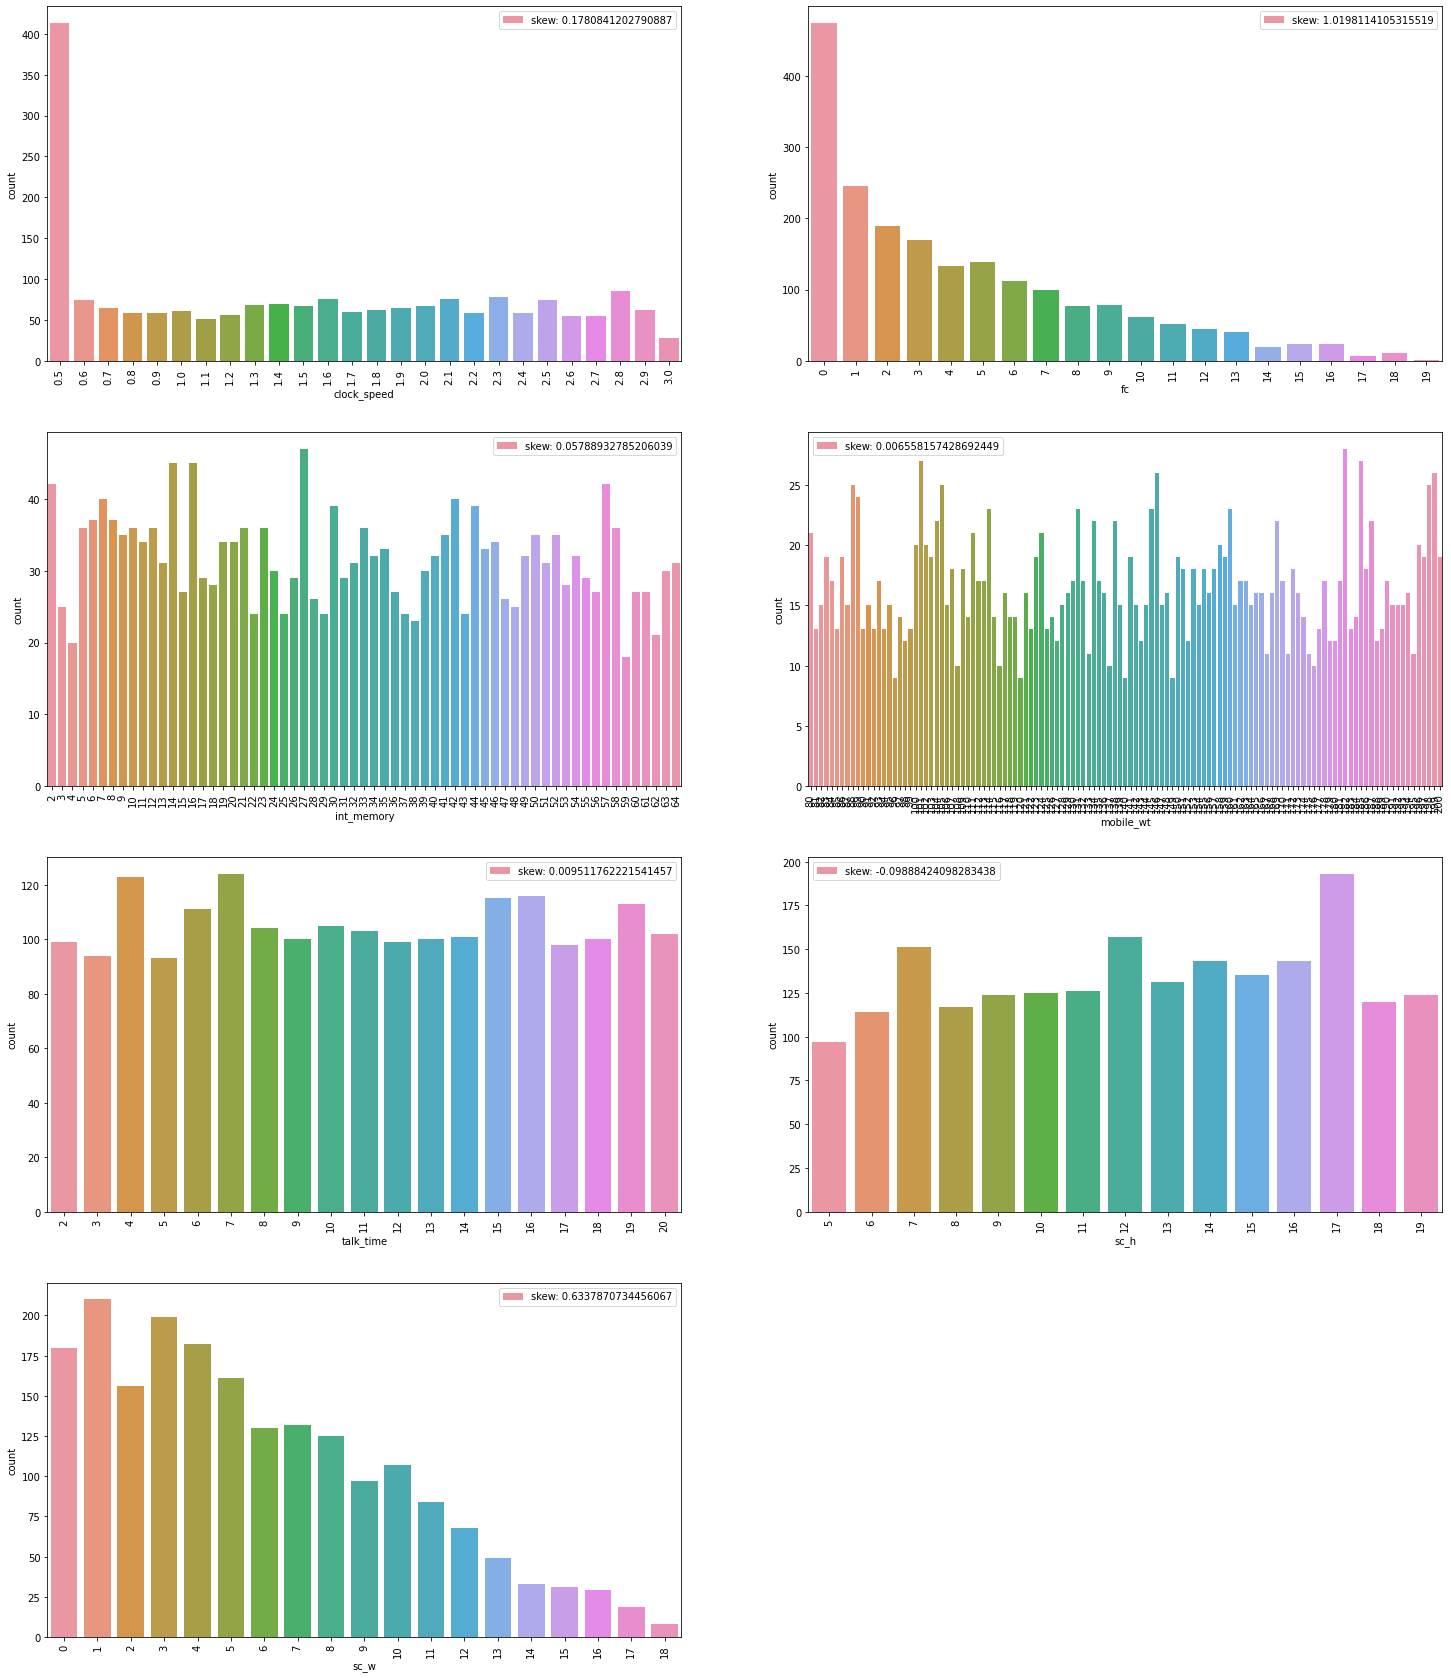

In [23]:
c= 1
plt1.figure(figsize = (25,30))
for i in discrete:
    plt1.subplot(4,2,c)
    c=c+1
    sns.countplot(df[i])
    
    plt1.legend(['skew: '+str(df[i].skew())])
    plt1.xticks(rotation=90)

In [25]:
df.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts','touch_screen':'value_counts','wifi':'value_counts'}).unstack()

blue      dual_sim      four_g      three_g      touch_screen      wifi     
     0    1        0    1      0    1       0    1            0    1    0    1
0  257  243      250  250    241  259     127  373          238  262  252  248
1  255  245      245  255    238  262     122  378          239  261  248  252
2  257  243      251  249    253  247     113  387          265  235  248  252
3  241  259      235  265    225  275     115  385          252  248  238  262

Text(0, 0.5, 'No. of phones')

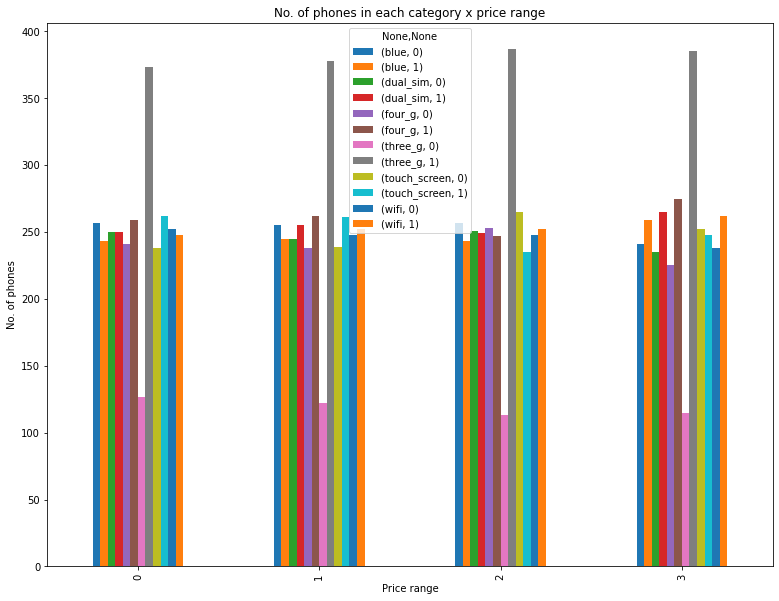

In [26]:
plt1.rcParams['figure.figsize']=(13,10)
df.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts','touch_screen':'value_counts','wifi':'value_counts'}).unstack().plot.bar()
plt1.title('No. of phones in each category x price range')
plt1.xlabel('Price range')
plt1.ylabel('No. of phones')

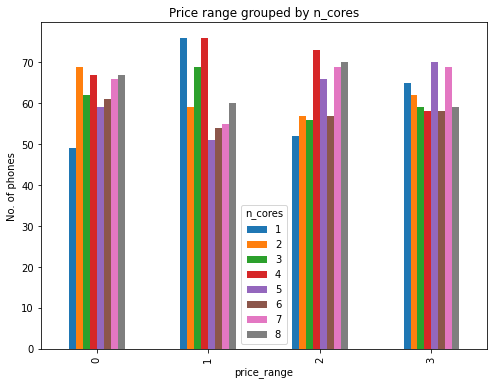

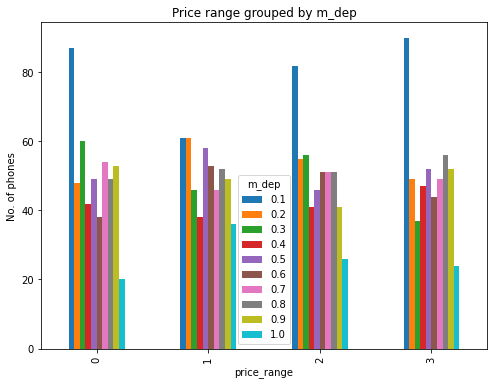

In [27]:
list1=['n_cores','m_dep']
for item in list1:
  plt1.rcParams['figure.figsize']=(8,6)
  df.groupby(['price_range'])[item].value_counts().unstack().plot.bar()
  plt1.title(f'Price range grouped by {item}')
  plt1.ylabel('No. of phones')

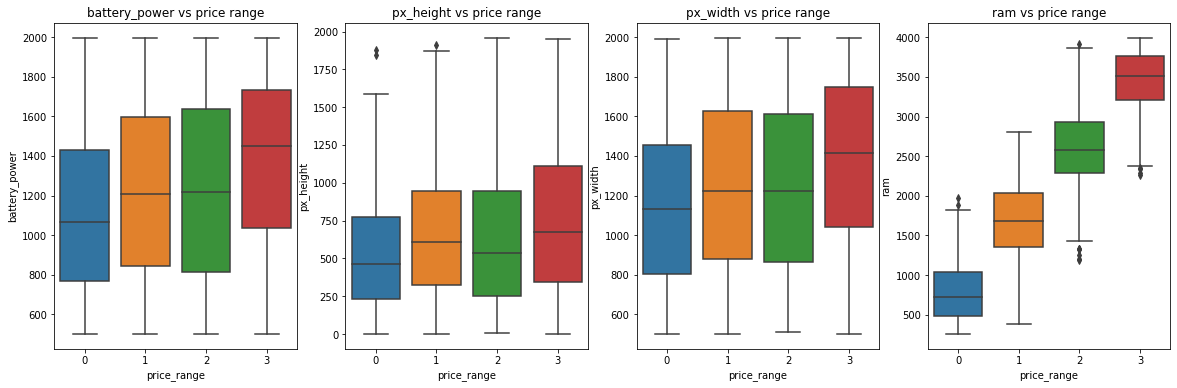

In [28]:

plt1.figure(figsize=(20,6))
for index,item in enumerate(cont_col):
  xtick=[0,1,2,3]
  plt1.subplot(1,4,index+1)
  plt1.xticks(xtick)
  sns.boxplot(x='price_range',y=item,data=df)
  plt1.title(f'{item} vs price range')

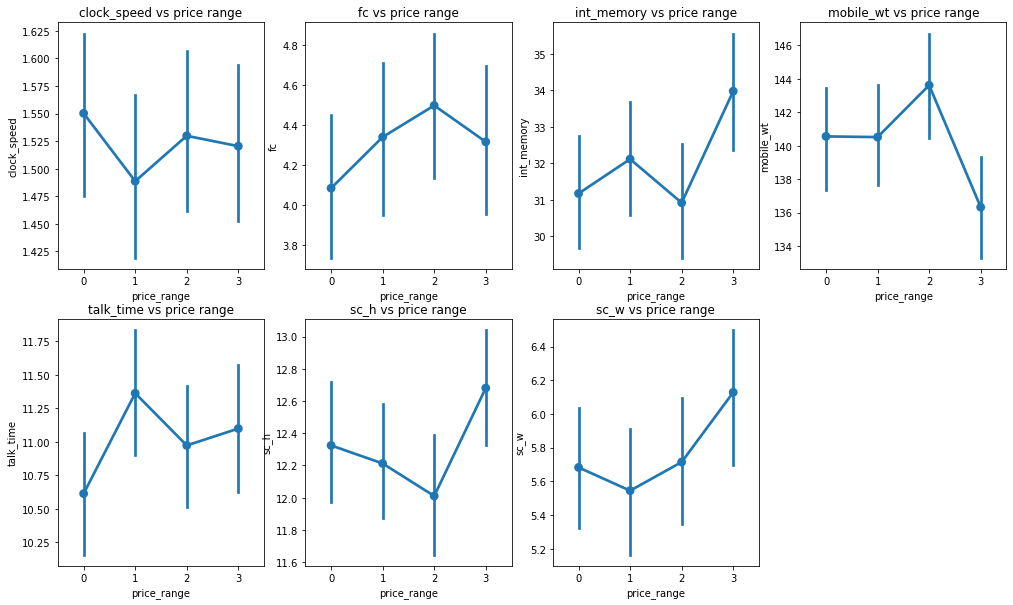

In [41]:
plt1.figure(figsize=(17,10))
for index,item in enumerate(discrete):
  plt1.subplot(2,4,index+1)
  sns.pointplot(x='price_range',y=item,data=df)
  plt1.title(f'{item} vs price range')

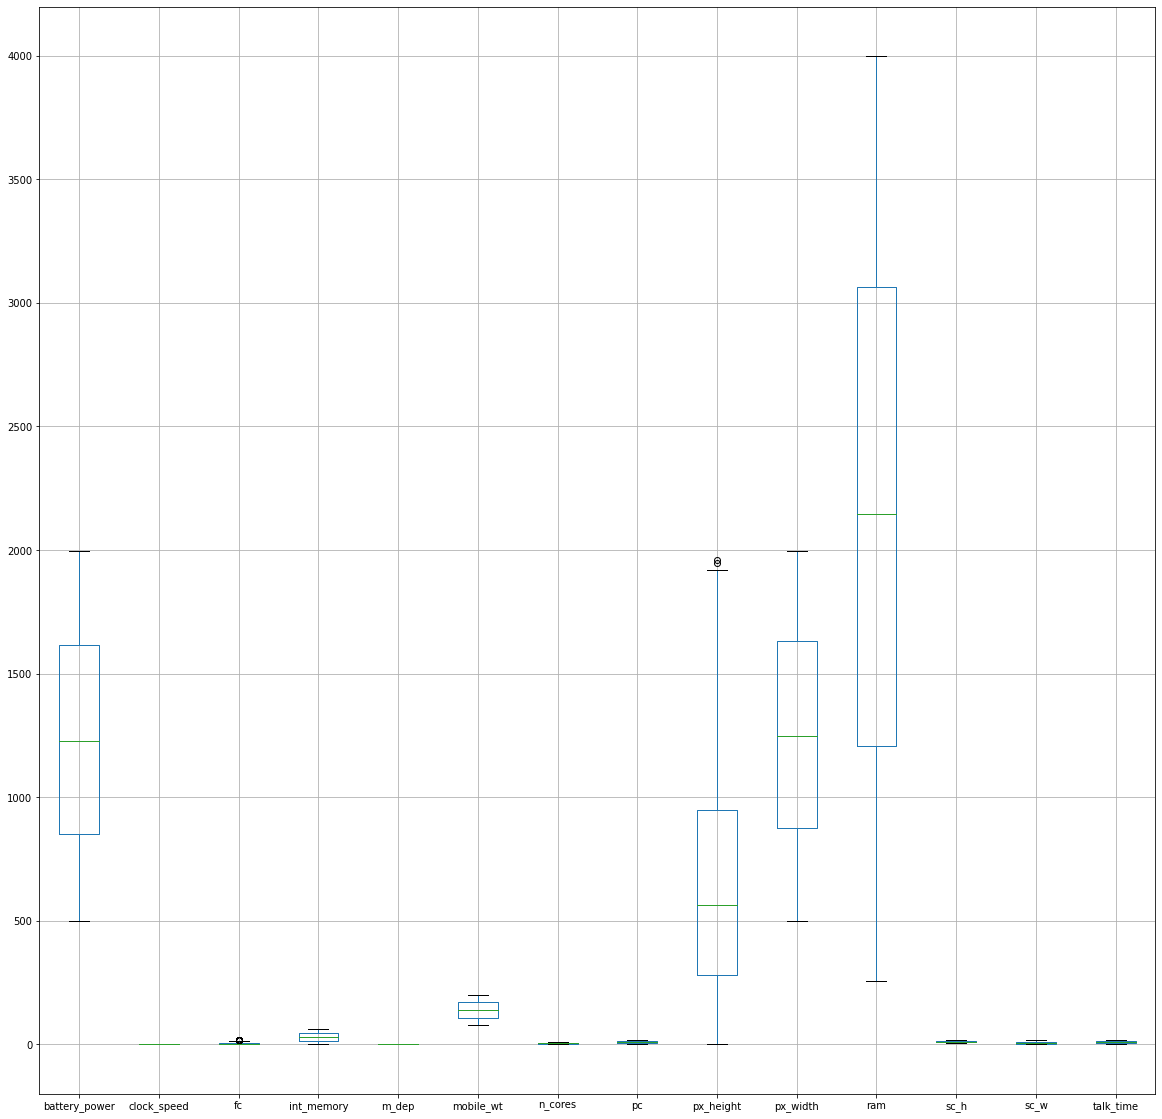

In [47]:
#finding outliers
fig = plt1.figure(figsize =(20, 20))
data = ['battery_power', 'clock_speed', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range']
# Creating plot
#plt1.boxplot(data)
boxplot = df.boxplot(column=['battery_power', 'clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'])

# show plot
plt1.show()